# Air Quality dataset

#Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.drop(columns=["Date", "Time"], inplace=True)
df.set_index("Datetime", inplace=True)
df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [3]:
pollutant_labels = ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T","RH","AH"]
df = df.replace(-200, np.nan).astype(float)
df.replace(-200, np.nan, inplace=True)
df_pollutants = df[pollutant_labels].copy()
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [4]:
df["Hour"] = df.index.hour
df["DayOfWeek"] = df.index.dayofweek
df["Month"] = df.index.month

In [5]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers = detect_outliers_iqr(df, "CO(GT)")
print(f"Number of outliers: {len(outliers)}")
outliers.head()


Number of outliers: 215


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,DayOfWeek,Month
Datetime,,,,,,,,,,,,,,,,
2004-03-11 19:00:00,6.9,1776.0,461.0,27.4,1488.0,383.0,702.0,172.0,2333.0,1704.0,9.7,69.3,0.8319,19,3,3
2004-03-11 20:00:00,6.1,1640.0,401.0,24.0,1404.0,351.0,743.0,165.0,2191.0,1654.0,9.6,67.8,0.8133,20,3,3
2004-03-12 20:00:00,6.6,1843.0,488.0,32.6,1610.0,340.0,624.0,170.0,2390.0,1887.0,12.9,50.5,0.7478,20,4,3
2004-03-14 20:00:00,5.9,1898.0,341.0,23.1,1381.0,325.0,681.0,173.0,2103.0,1905.0,17.6,46.1,0.9210,20,6,3
2004-03-15 09:00:00,8.1,1961.0,618.0,36.7,1701.0,478.0,537.0,149.0,2665.0,2184.0,14.8,54.3,0.9076,9,0,3


In [6]:
df_pollutants = df[pollutant_labels]
for col in pollutant_labels:
    detect_outliers_iqr(df, col)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_pollutants_scaled = pd.DataFrame(scaler.fit_transform(df_pollutants), columns=df_pollutants.columns)
df_pollutants_scaled.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.307778,1.198550,-0.336738,0.243898,0.400450,-0.379859,0.858660,-0.001887,0.680947,0.615100,-0.534197,-0.019300,-0.663043
1,-0.105116,0.885284,-0.522696,-0.091699,0.059391,-0.675681,1.318156,-0.436067,0.296762,-0.127757,-0.568166,-0.088601,-0.743035
2,0.032516,1.392038,-0.640142,-0.145395,-0.000575,-0.544205,1.185759,0.018789,0.285208,0.128228,-0.726687,0.275226,-0.681865
3,0.032516,1.272260,-0.679291,-0.118547,0.033156,-0.351685,0.998845,0.184191,0.368977,0.451972,-0.828594,0.621728,-0.591471
4,-0.380378,0.793147,-0.821206,-0.480992,-0.386608,-0.544205,1.438871,0.060139,0.097448,0.218575,-0.805948,0.598628,-0.586271


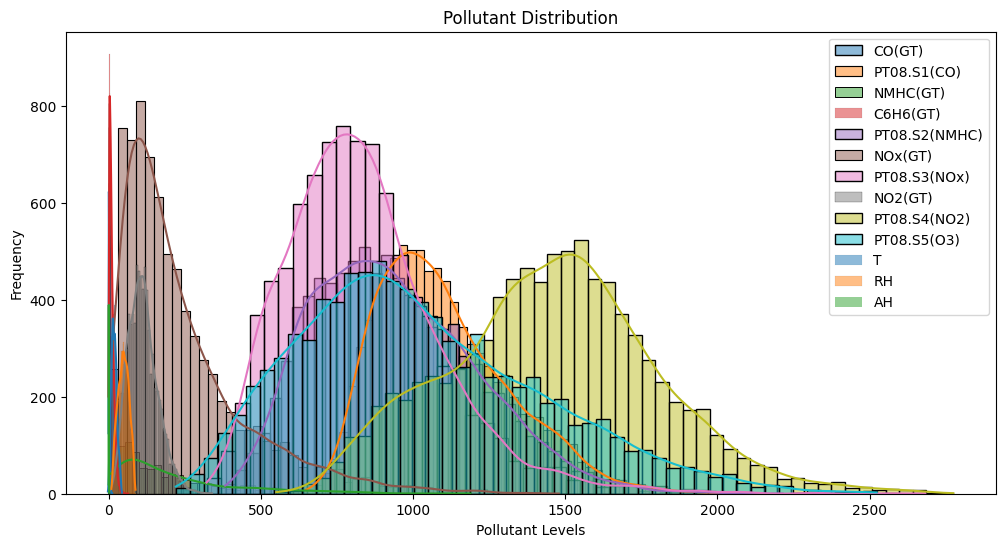

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for col in pollutant_labels:
    sns.histplot(df[col], bins=50, kde=True, label=col, alpha=0.5)
plt.legend()
plt.xlabel("Pollutant Levels")
plt.ylabel("Frequency")
plt.title("Pollutant Distribution")
plt.show()

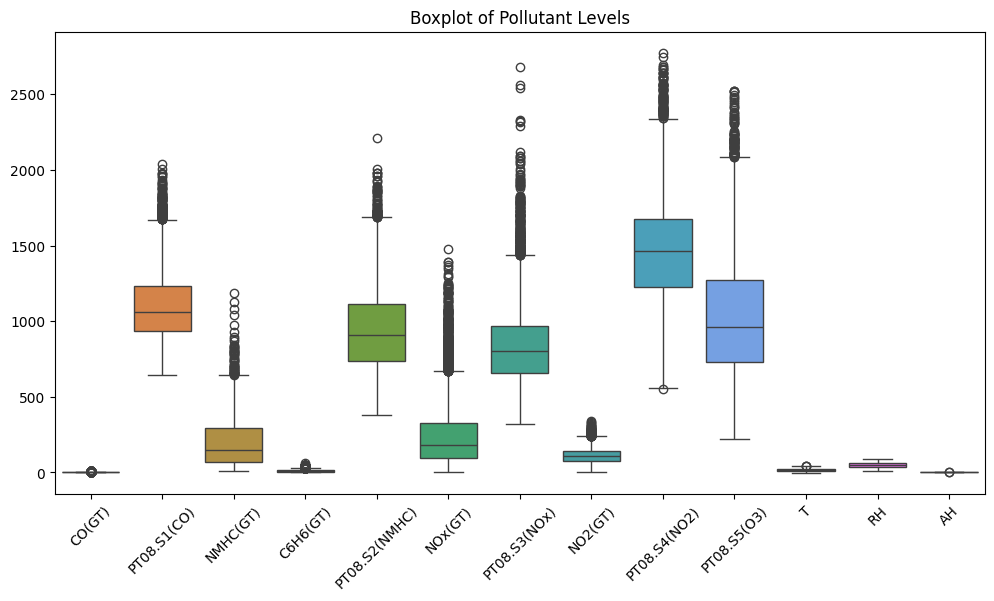

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pollutants)
plt.xticks(rotation=45)
plt.title("Boxplot of Pollutant Levels")
plt.show()

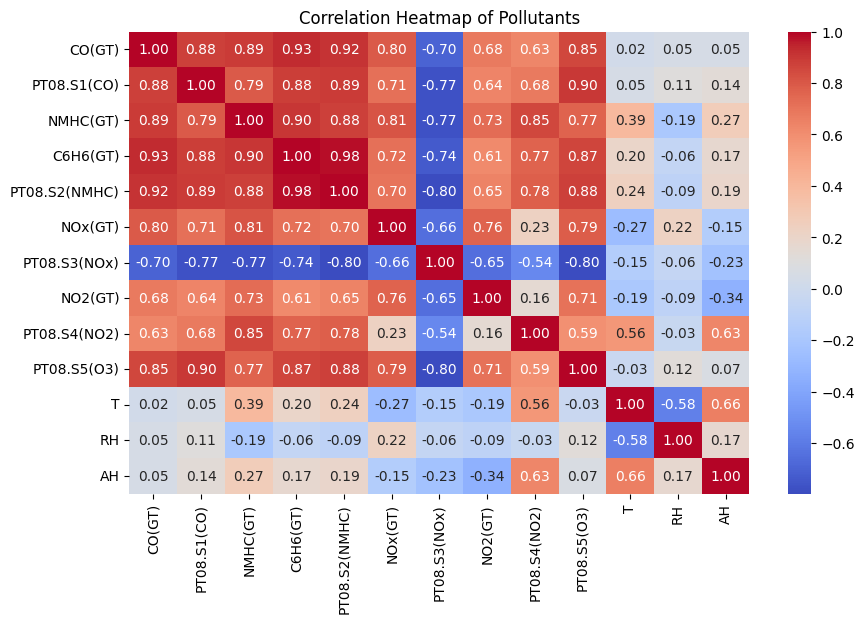

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_pollutants.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Pollutants")
plt.show()

In [11]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,DayOfWeek,Month
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,11.498557,3.009939,6.310356
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,6.923182,2.000323,3.438160
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,0.000000,0.000000,1.000000
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,5.000000,1.000000,3.000000
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,11.000000,3.000000,6.000000
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,18.000000,5.000000,9.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,23.000000,6.000000,12.000000


In [12]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,DayOfWeek,Month
Datetime,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,2,3
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,2,3
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,2,3
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,2,3
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,2,3


In [13]:
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Hour               int32
DayOfWeek          int32
Month              int32
dtype: object